<a href="https://colab.research.google.com/github/SatishAwal/Machine-Learning-Foundations-Midterm-1/blob/main/mlmidtermproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets from  https://data.techforpalestine.org/

##Data Cleaning and Preprocessing

In [ ]:
import pandas as pd

# Load the dataset
file_path="/content/killed_in_gaza.xlsx"

#df = pd.read_csv('killed-in-gaza.csv')

# Read a specific sheet by name
df = pd.read_excel(file_path, sheet_name='Sheet1')
df_report = pd.read_excel(file_path, sheet_name='Sheet2')

# Display the first few rows
print(df.head())

# Display the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Display summary statistics
print(df.describe(include='all'))


          id                                       name  \
0  999783350      Ø±Ø£ÙØª Ø§Ù…ÙŠØ± Ø­Ù…Ø¯Ø§Ù† Ø¹Ø§Ø¨Ø¯   
1  999783079  Ù†Ø§Ù‡Ø¶ Ø­Ù„Ù…ÙŠ ØµØ§Ù„Ø­ Ø§Ù„Ù…ÙŠØ¯Ù†Ù‡   
2  999781917      Ø¹Ù„ÙŠ Ø³ÙŠØ¯ Ø¹Ù„ÙŠ Ø§Ù„Ø´Ø¹Ø±Ø§ÙˆÙŠ   
3  999781826    Ù…Ø­Ù…Ø¯ Ø¹Ø·Ø§ Ø±ÙˆØ¨ÙŠÙ† Ø§Ù„ÙØ±Ø§Ù…   
4  999781396          Ø¥ÙŠØ§Ø¯ Ø±ÙŠØ§Ø¶ Ø­Ø³Ù† Ø­Ø¬Ø§Ø¬   

                        en_name  age date_of_birth  sex source date_of_death  
0        Rafat Amir Hamdan Abed   50    1973-03-23    m      u    2023-03-23  
1   Nahed Hilmi Saleh Al-Meidna   53    1970-11-26    m      u    2023-11-26  
2      Ali Sayed Ali Al-Sharawi   46    1976-11-15    m      u    2022-11-15  
3  Mohammed Ata Rubin Al-Farram   47    1976-12-18  NaN      u    2023-12-18  
4      Iyad Riyad Hassan Hajjaj   47    1976-12-17    m      u    2023-12-17  
Dataset contains 50020 rows and 8 columns.

Missing values per column:
id                0
name              0
en_name           0
age               0
date_of_birth     0


###Handling Missing Values

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Fill missing 'age' values with the median age
df['age'].fillna(df['age'].median())

# Fill missing 'dob' values with a placeholder
df['date_of_birth'].fillna('Unknown')

# Fill missing 'sex' values with 'Unknown'
df['sex'].fillna('Unknown')

# Fill missing 'sex' values with 'Unknown'
df['date_of_death'].fillna('Unknown')
print(df.shape)


id                 0
name               0
en_name            0
age                0
date_of_birth      0
sex               10
source             6
date_of_death      0
calculated_age     0
age_group          0
dtype: int64
(50020, 10)


##Gender Distribution of Fatalities

In [ ]:
# Count of fatalities by gender
gender_counts = df['sex'].value_counts()
print(gender_counts)


sex
m    33507
f    16503
Name: count, dtype: int64


##Age Distribution of Fatalities

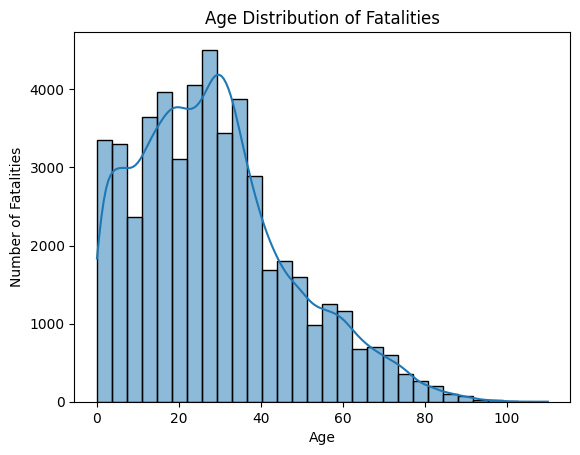

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of age distribution
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution of Fatalities')
plt.xlabel('Age')
plt.ylabel('Number of Fatalities')
plt.show()


##Age Groups and Gender

In [ ]:
# Define age bins and labels
bins = [0, 12, 18, 40, 60, 120]
labels = ['Child', 'Youth', 'Adult', 'Middle Age', 'Senior']

# Create an age group column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by gender and age group and count fatalities
demographic_counts = df.groupby(['sex', 'age_group'], observed=True).size().unstack(fill_value=0)
#observed=True means only include the categories that appear in the data.

print(demographic_counts)

age_group  Child  Youth  Adult  Middle Age  Senior
sex                                               
f           4640   2074   5740        2564    1485
m           5230   3669  16555        5701    2352


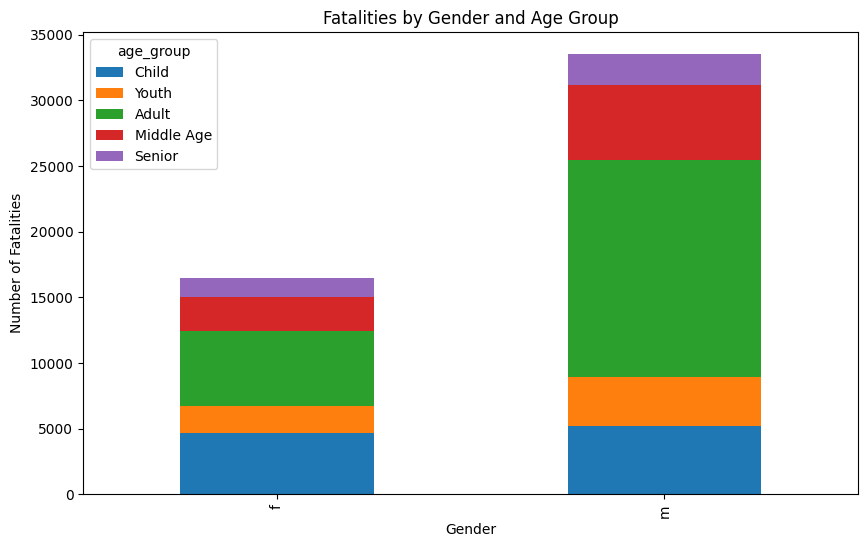

In [ ]:
demographic_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Fatalities by Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Number of Fatalities')
plt.show()


date_of_death
2022-10-31     298
2022-11-30    1205
2022-12-31    2111
2023-01-31    2903
2023-02-28    2489
2023-03-31    2764
2023-04-30    2468
2023-05-31    2517
2023-06-30    2774
2023-07-31    3257
Freq: ME, dtype: int64
Total months: 30


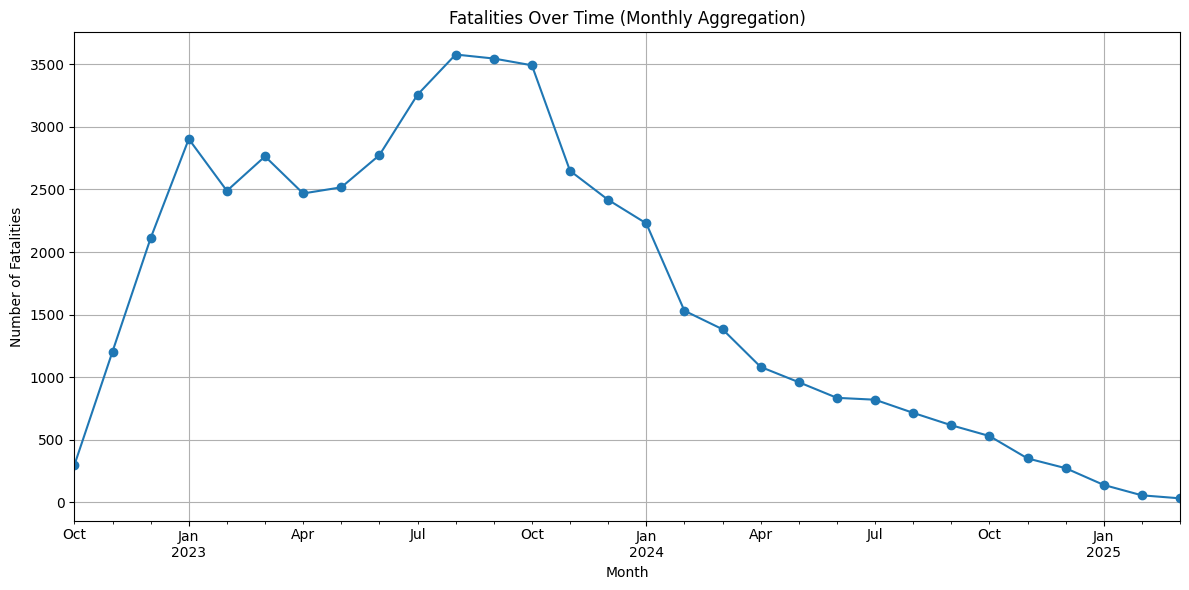

In [ ]:
# Convert date_of_death to datetime if not already
df['date_of_death'] = pd.to_datetime(df['date_of_death'], errors='coerce')

# Filter out rows where date_of_death is NaT
df_time = df.dropna(subset=['date_of_death'])

# Set the date as index for resampling
df_time = df_time.set_index('date_of_death')

# Group fatalities by month
fatalities_by_month = df_time.resample('ME').size()

# Print check
print(fatalities_by_month.head(10))
print(f"Total months: {len(fatalities_by_month)}")

# Plot
plt.figure(figsize=(12, 6))
fatalities_by_month.plot(marker='o', linestyle='-')
plt.title('Fatalities Over Time (Monthly Aggregation)')
plt.xlabel('Month')
plt.ylabel('Number of Fatalities')
plt.grid(True)
plt.tight_layout()
plt.show()